In [105]:
import torch
from torch import nn   # pytroch building blocks for neural network
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make data
import sklearn
from sklearn.datasets import make_circles

In [106]:
# Make data
sample_num = 1000
X, y = make_circles(sample_num,
                    noise = 0.025,
                    random_state = 314)

# Features in the data created
X[:5], y[:5]

(array([[-0.78341072, -0.11292122],
        [-0.95901674, -0.36690097],
        [ 0.78365307,  0.16764736],
        [-0.80657477, -0.65555333],
        [ 0.1713853 ,  0.98111385]]),
 array([1, 0, 1, 0, 0], dtype=int64))

In [107]:
# Convert the data to pandas dataframe
circles = pd.DataFrame({"X1": X[:,0], 
                        "X2": X[:,1],
                        "Label":y})
circles

,X1,X2,Label
0,-0.783411,-0.112921,1
1,-0.959017,-0.366901,0
2,0.783653,0.167647,1
3,-0.806575,-0.655553,0
4,0.171385,0.981114,0
...,...,...,...
995,-0.150737,-0.768587,1
996,0.644825,-0.464614,1
997,-0.704483,0.361199,1
998,0.043465,0.813719,1


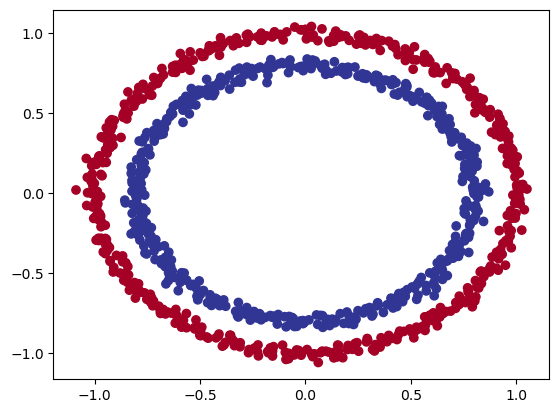

In [108]:
# Visualize the data
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [111]:
# Convert data to tensor
X = torch.tensor(X)
y = torch.tensor(y)

C:\Users\tianx\AppData\Local\Temp\ipykernel_9360\1103690213.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
C:\Users\tianx\AppData\Local\Temp\ipykernel_9360\1103690213.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [ ]:
# Split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = tr